# Diaptera wings classification using Topological Data Analysis

Guilherme Vituri F. Pinto [](https://orcid.org/0000-0002-7813-8777) (Universidade Estadual Paulista)  
Sergio UraNorthonFebruary 10, 2026

We studied etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc

In [2]:
using TDAfly, TDAfly.Preprocessing, TDAfly.TDA, TDAfly.Analysis
using Images: mosaicview
using Plots: plot, display, heatmap, scatter
using StatsPlots: boxplot
using PersistenceDiagrams

## 1 Introduction

Falar sobre o dataset, TDA, etc.

## 2 Methods

All images are in the `images/processed` directory. For each image, we load it, apply a gaussian blur, crop and make it have 150 pixels of height. The blurring step is necessary to “glue” small holes in the figure and keep it connected.

In [3]:
paths = readdir("images/processed", join = true)
species = basename.(paths) .|> (x -> replace(x, ".png" => ""))

# Extract family name from filename, normalizing typos and separators
function extract_family(name)
    family_raw = lowercase(split(name, r"[\s\-]")[1])
    if family_raw in ("bibionidae", "biobionidae")
        return "Bibionidae"
    elseif family_raw in ("sciaridae", "scaridae")
        return "Sciaridae"
    else
        return titlecase(family_raw)
    end
end

families = extract_family.(species)

individuals = map(species) do specie
    parts = split(specie, r"[\s\-]")
    string(extract_family(specie)[1]) * "-" * parts[end]
end

wings = load_wing.(paths, blur = 1.3)
Xs = map(image_to_r2, wings);


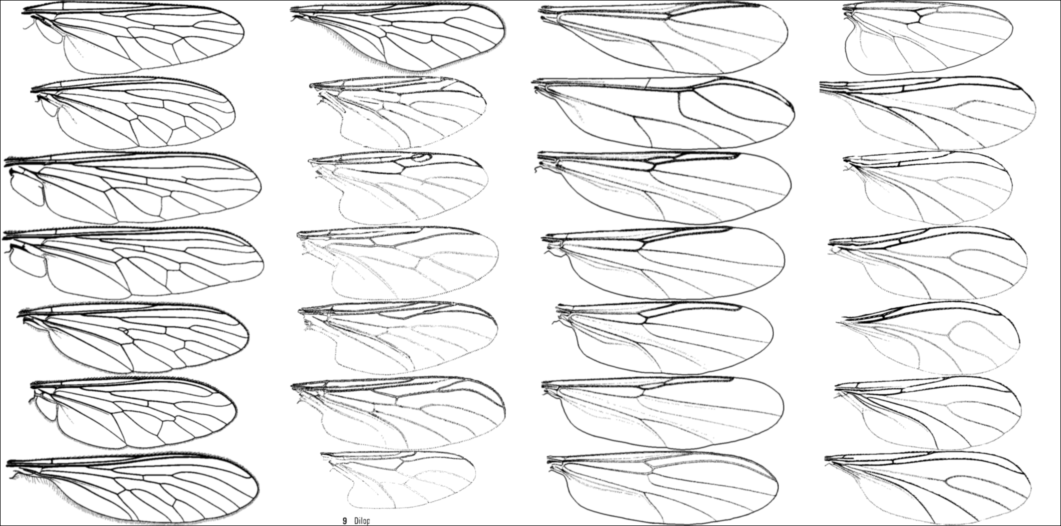

In [4]:
mosaicview(wings, ncol = 4, fillvalue=1)

### 2.1 Vietoris-Rips filtration

We select 1000 points from each image using a farthest point sample method

In [5]:
samples = map(Xs) do X
  farthest_points_sample(X, 1000)
end;

and create an empty dictionary to store all computations

In [6]:
simple_rips_dc = Dict();

We then calculate its persistence diagrams using the Vietoris-Rips filtration etc.

In [7]:
# get only the 1-dimensional PD
simple_rips_dc["PD"] = rips_pd.(samples, cutoff = 5, threshold = 200) .|> last;

We create the 1-dimensional persistence image for each persistence diagram using 10x10 matrices

In [8]:
PI = PersistenceImage(simple_rips_dc["PD"], size = (10, 10))

simple_rips_dc["PI"] = PI.(simple_rips_dc["PD"]);

#### 2.1.1 Examples

Below are some examples of 1-dimensional barcodes, its persistence image and the original wing that generated it. Note: we are plotting the barcode using the birth and persistence.

In [9]:
# plot one example per family
example_indices = [findfirst(==(f), families) for f in unique(families)]
map(example_indices) do i
  p = plot_wing_with_pd(simple_rips_dc["PD"][i], simple_rips_dc["PI"][i], samples[i], species[i])
  display(p)
end;

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<path clip-path="url(#clip420)" d="M466.042 928.945 Q462.431 928.945 460.602 932.51 Q458.796 936.051 458.796 943.181 Q458.796 950.287 460.602 953.852 Q462.431 957.394 466.042 957.394 Q469.676 957.394 471.482 953.852 Q473.31 950.287 473.31 943.181 Q473.31 936.051 471.482 932.51 Q469.676 928.945 466.042 928.945 M466.042 925.241 Q471.852 925.241 474.907 929.848 Q477.986 934.431 477.986 943.181 Q477.986 951.908 474.907 956.514 Q471.852 961.097 466.042 961.097 Q460.232 961.097 457.153 956.514 Q454.097 951.908 454.097 943.181 Q454.097 934.431 457.153 929.848 Q460.232 925.241 466.042 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip420)" d="M599.947 928.945 Q596.336 928.945 594.507 932.51 Q592.702 936.051 592.702 943.181 Q592.702 950.287 594.507 953.852 Q596.336 957.394 599.947 957.394 Q603.581 957.394 605.387 953.852 Q607.215 950.287 607.215 943.181 Q607.215 936.051 605.387 932.51 Q603.581 928.945 599.947 928.945 M599.947 925.241 Q605.757 925.241 608.813 929.848 Q611.891 934.431 611.891 943.181 Q611.891 951.908 608.813 956.514 Q605.757 961.097 599.947 961.097 Q594.137 961.097 591.058 956.514 Q588.003 951.908 588.003 943.181 Q588.003 934.431 591.058 929.848 Q594.137 925.241 599.947 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip420)" d="M684.547 956.491 L700.866 956.491 L700.866 960.426 L678.922 960.426 L678.922 956.491 Q681.584 953.736 686.167 949.107 Q690.774 944.454 691.954 943.111 Q694.199 940.588 695.079 938.852 Q695.982 937.093 695.982 935.403 Q695.982 932.649 694.037 930.912 Q692.116 929.176 689.014 929.176 Q686.815 929.176 684.362 929.94 Q681.931 930.704 679.153 932.255 L679.153 927.533 Q681.977 926.399 684.431 925.82 Q686.885 925.241 688.922 925.241 Q694.292 925.241 697.486 927.926 Q700.681 930.612 700.681 935.102 Q700.681 937.232 699.871 939.153 Q699.084 941.051 696.977 943.644 Q696.399 944.315 693.297 947.533 Q690.195 950.727 684.547 956.491 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip420)" d="M720.681 928.945 Q717.07 928.945 715.241 932.51 Q713.435 936.051 713.435 943.181 Q713.435 950.287 715.241 953.852 Q717.07 957.394 720.681 957.394 Q724.315 957.394 726.121 953.852 Q727.949 950.287 727.949 943.181 Q727.949 936.051 726.121 932.51 Q724.315 928.945 720.681 928.945 M720.681 925.241 Q726.491 925.241 729.546 929.848 Q732.625 934.431 732.625 943.181 Q732.625 951.908 729.546 956.514 Q726.491 961.097 720.681 961.097 Q714.871 961.097 711.792 956.514 Q708.736 951.908 708.736 943.181 Q708.736 934.431 711.792 929.848 Q714.871 925.241 720.681 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip420)" d="M814.482 941.792 Q817.838 942.51 819.713 944.778 Q821.612 947.047 821.612 950.38 Q821.612 955.496 818.093 958.297 Q814.575 961.097 808.093 961.097 Q805.917 961.097 803.602 960.658 Q801.311 960.241 798.857 959.384 L798.857 954.871 Q800.801 956.005 803.116 956.584 Q805.431 957.162 807.954 957.162 Q812.352 957.162 814.644 955.426 Q816.959 953.69 816.959 950.38 Q816.959 947.324 814.806 945.611 Q812.676 943.875 808.857 943.875 L804.829 943.875 L804.829 940.033 L809.042 940.033 Q812.491 940.033 814.32 938.667 Q816.149 937.278 816.149 934.686 Q816.149 932.024 814.25 930.612 Q812.375 929.176 808.857 929.176 Q806.936 929.176 804.737 929.593 Q802.538 930.01 799.899 930.889 L799.899 926.723 Q802.561 925.982 804.876 925.612 Q807.213 925.241 809.274 925.241 Q814.598 925.241 817.7 927.672 Q820.801 930.079 820.801 934.199 Q820.801 937.07 819.158 939.061 Q817.514 941.028 814.482 941.792 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip420)" d="M840.477 928.945 Q836.866 928.945 835.037 932.51 Q833.232 936.051 833.232 943.181 Q833.232 950.287 835.037 953.852 Q836.866 957.394 840.477 957.394 Q844.111 957.394 845.917 953.852 Q847.746 950.287 847.74

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<path clip-path="url(#clip540)" d="M466.042 928.945 Q462.431 928.945 460.602 932.51 Q458.796 936.051 458.796 943.181 Q458.796 950.287 460.602 953.852 Q462.431 957.394 466.042 957.394 Q469.676 957.394 471.482 953.852 Q473.31 950.287 473.31 943.181 Q473.31 936.051 471.482 932.51 Q469.676 928.945 466.042 928.945 M466.042 925.241 Q471.852 925.241 474.907 929.848 Q477.986 934.431 477.986 943.181 Q477.986 951.908 474.907 956.514 Q471.852 961.097 466.042 961.097 Q460.232 961.097 457.153 956.514 Q454.097 951.908 454.097 943.181 Q454.097 934.431 457.153 929.848 Q460.232 925.241 466.042 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip540)" d="M597.857 928.945 Q594.246 928.945 592.417 932.51 Q590.611 936.051 590.611 943.181 Q590.611 950.287 592.417 953.852 Q594.246 957.394 597.857 957.394 Q601.491 957.394 603.296 953.852 Q605.125 950.287 605.125 943.181 Q605.125 936.051 603.296 932.51 Q601.491 928.945 597.857 928.945 M597.857 925.241 Q603.667 925.241 606.722 929.848 Q609.801 934.431 609.801 943.181 Q609.801 951.908 606.722 956.514 Q603.667 961.097 597.857 961.097 Q592.046 961.097 588.968 956.514 Q585.912 951.908 585.912 943.181 Q585.912 934.431 588.968 929.848 Q592.046 925.241 597.857 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip540)" d="M680.366 956.491 L696.686 956.491 L696.686 960.426 L674.741 960.426 L674.741 956.491 Q677.403 953.736 681.987 949.107 Q686.593 944.454 687.774 943.111 Q690.019 940.588 690.899 938.852 Q691.801 937.093 691.801 935.403 Q691.801 932.649 689.857 930.912 Q687.936 929.176 684.834 929.176 Q682.635 929.176 680.181 929.94 Q677.75 930.704 674.973 932.255 L674.973 927.533 Q677.797 926.399 680.25 925.82 Q682.704 925.241 684.741 925.241 Q690.112 925.241 693.306 927.926 Q696.5 930.612 696.5 935.102 Q696.5 937.232 695.69 939.153 Q694.903 941.051 692.797 943.644 Q692.218 944.315 689.116 947.533 Q686.014 950.727 680.366 956.491 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip540)" d="M716.5 928.945 Q712.889 928.945 711.06 932.51 Q709.255 936.051 709.255 943.181 Q709.255 950.287 711.06 953.852 Q712.889 957.394 716.5 957.394 Q720.135 957.394 721.94 953.852 Q723.769 950.287 723.769 943.181 Q723.769 936.051 721.94 932.51 Q720.135 928.945 716.5 928.945 M716.5 925.241 Q722.31 925.241 725.366 929.848 Q728.445 934.431 728.445 943.181 Q728.445 951.908 725.366 956.514 Q722.31 961.097 716.5 961.097 Q710.69 961.097 707.611 956.514 Q704.556 951.908 704.556 943.181 Q704.556 934.431 707.611 929.848 Q710.69 925.241 716.5 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip540)" d="M808.211 941.792 Q811.568 942.51 813.443 944.778 Q815.341 947.047 815.341 950.38 Q815.341 955.496 811.822 958.297 Q808.304 961.097 801.822 961.097 Q799.646 961.097 797.332 960.658 Q795.04 960.241 792.586 959.384 L792.586 954.871 Q794.531 956.005 796.845 956.584 Q799.16 957.162 801.683 957.162 Q806.082 957.162 808.373 955.426 Q810.688 953.69 810.688 950.38 Q810.688 947.324 808.535 945.611 Q806.406 943.875 802.586 943.875 L798.558 943.875 L798.558 940.033 L802.771 940.033 Q806.22 940.033 808.049 938.667 Q809.878 937.278 809.878 934.686 Q809.878 932.024 807.98 930.612 Q806.105 929.176 802.586 929.176 Q800.665 929.176 798.466 929.593 Q796.267 930.01 793.628 930.889 L793.628 926.723 Q796.29 925.982 798.605 925.612 Q800.943 925.241 803.003 925.241 Q808.327 925.241 811.429 927.672 Q814.531 930.079 814.531 934.199 Q814.531 937.07 812.887 939.061 Q811.244 941.028 808.211 941.792 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip540)" d="M834.206 928.945 Q830.595 928.945 828.767 932.51 Q826.961 936.051 826.961 943.181 Q826.961 950.287 828.767 953.852 Q830.595 957.394 834.206 957.394 Q837.841 957.394 839.646 953.852 Q841.475 950.287 841.475 943.181 Q841.475 936.051 8

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<path clip-path="url(#clip660)" d="M466.042 928.945 Q462.431 928.945 460.602 932.51 Q458.796 936.051 458.796 943.181 Q458.796 950.287 460.602 953.852 Q462.431 957.394 466.042 957.394 Q469.676 957.394 471.482 953.852 Q473.31 950.287 473.31 943.181 Q473.31 936.051 471.482 932.51 Q469.676 928.945 466.042 928.945 M466.042 925.241 Q471.852 925.241 474.907 929.848 Q477.986 934.431 477.986 943.181 Q477.986 951.908 474.907 956.514 Q471.852 961.097 466.042 961.097 Q460.232 961.097 457.153 956.514 Q454.097 951.908 454.097 943.181 Q454.097 934.431 457.153 929.848 Q460.232 925.241 466.042 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip660)" d="M583.973 928.945 Q580.362 928.945 578.533 932.51 Q576.728 936.051 576.728 943.181 Q576.728 950.287 578.533 953.852 Q580.362 957.394 583.973 957.394 Q587.607 957.394 589.413 953.852 Q591.241 950.287 591.241 943.181 Q591.241 936.051 589.413 932.51 Q587.607 928.945 583.973 928.945 M583.973 925.241 Q589.783 925.241 592.839 929.848 Q595.917 934.431 595.917 943.181 Q595.917 951.908 592.839 956.514 Q589.783 961.097 583.973 961.097 Q578.163 961.097 575.084 956.514 Q572.029 951.908 572.029 943.181 Q572.029 934.431 575.084 929.848 Q578.163 925.241 583.973 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip660)" d="M652.599 956.491 L668.918 956.491 L668.918 960.426 L646.974 960.426 L646.974 956.491 Q649.636 953.736 654.219 949.107 Q658.826 944.454 660.006 943.111 Q662.252 940.588 663.131 938.852 Q664.034 937.093 664.034 935.403 Q664.034 932.649 662.09 930.912 Q660.168 929.176 657.066 929.176 Q654.867 929.176 652.414 929.94 Q649.983 930.704 647.205 932.255 L647.205 927.533 Q650.029 926.399 652.483 925.82 Q654.937 925.241 656.974 925.241 Q662.344 925.241 665.539 927.926 Q668.733 930.612 668.733 935.102 Q668.733 937.232 667.923 939.153 Q667.136 941.051 665.029 943.644 Q664.451 944.315 661.349 947.533 Q658.247 950.727 652.599 956.491 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip660)" d="M688.733 928.945 Q685.122 928.945 683.293 932.51 Q681.488 936.051 681.488 943.181 Q681.488 950.287 683.293 953.852 Q685.122 957.394 688.733 957.394 Q692.367 957.394 694.173 953.852 Q696.001 950.287 696.001 943.181 Q696.001 936.051 694.173 932.51 Q692.367 928.945 688.733 928.945 M688.733 925.241 Q694.543 925.241 697.599 929.848 Q700.677 934.431 700.677 943.181 Q700.677 951.908 697.599 956.514 Q694.543 961.097 688.733 961.097 Q682.923 961.097 679.844 956.514 Q676.789 951.908 676.789 943.181 Q676.789 934.431 679.844 929.848 Q682.923 925.241 688.733 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip660)" d="M766.56 941.792 Q769.917 942.51 771.792 944.778 Q773.69 947.047 773.69 950.38 Q773.69 955.496 770.171 958.297 Q766.653 961.097 760.171 961.097 Q757.995 961.097 755.681 960.658 Q753.389 960.241 750.935 959.384 L750.935 954.871 Q752.88 956.005 755.194 956.584 Q757.509 957.162 760.032 957.162 Q764.431 957.162 766.722 955.426 Q769.037 953.69 769.037 950.38 Q769.037 947.324 766.884 945.611 Q764.755 943.875 760.935 943.875 L756.907 943.875 L756.907 940.033 L761.12 940.033 Q764.569 940.033 766.398 938.667 Q768.227 937.278 768.227 934.686 Q768.227 932.024 766.329 930.612 Q764.454 929.176 760.935 929.176 Q759.014 929.176 756.815 929.593 Q754.616 930.01 751.977 930.889 L751.977 926.723 Q754.639 925.982 756.954 925.612 Q759.292 925.241 761.352 925.241 Q766.676 925.241 769.778 927.672 Q772.88 930.079 772.88 934.199 Q772.88 937.07 771.236 939.061 Q769.593 941.028 766.56 941.792 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip660)" d="M792.555 928.945 Q788.944 928.945 787.116 932.51 Q785.31 936.051 785.31 943.181 Q785.31 950.287 787.116 953.852 Q788.944 957.394 792.555 957.394 Q796.19 957.394 797.995 953.852 Q799.824 950.287 799.824 9

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<path clip-path="url(#clip780)" d="M466.042 928.945 Q462.431 928.945 460.602 932.51 Q458.796 936.051 458.796 943.181 Q458.796 950.287 460.602 953.852 Q462.431 957.394 466.042 957.394 Q469.676 957.394 471.482 953.852 Q473.31 950.287 473.31 943.181 Q473.31 936.051 471.482 932.51 Q469.676 928.945 466.042 928.945 M466.042 925.241 Q471.852 925.241 474.907 929.848 Q477.986 934.431 477.986 943.181 Q477.986 951.908 474.907 956.514 Q471.852 961.097 466.042 961.097 Q460.232 961.097 457.153 956.514 Q454.097 951.908 454.097 943.181 Q454.097 934.431 457.153 929.848 Q460.232 925.241 466.042 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip780)" d="M608.659 928.945 Q605.048 928.945 603.219 932.51 Q601.413 936.051 601.413 943.181 Q601.413 950.287 603.219 953.852 Q605.048 957.394 608.659 957.394 Q612.293 957.394 614.099 953.852 Q615.927 950.287 615.927 943.181 Q615.927 936.051 614.099 932.51 Q612.293 928.945 608.659 928.945 M608.659 925.241 Q614.469 925.241 617.524 929.848 Q620.603 934.431 620.603 943.181 Q620.603 951.908 617.524 956.514 Q614.469 961.097 608.659 961.097 Q602.849 961.097 599.77 956.514 Q596.714 951.908 596.714 943.181 Q596.714 934.431 599.77 929.848 Q602.849 925.241 608.659 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip780)" d="M701.97 956.491 L718.29 956.491 L718.29 960.426 L696.345 960.426 L696.345 956.491 Q699.007 953.736 703.591 949.107 Q708.197 944.454 709.378 943.111 Q711.623 940.588 712.503 938.852 Q713.406 937.093 713.406 935.403 Q713.406 932.649 711.461 930.912 Q709.54 929.176 706.438 929.176 Q704.239 929.176 701.785 929.94 Q699.355 930.704 696.577 932.255 L696.577 927.533 Q699.401 926.399 701.855 925.82 Q704.308 925.241 706.345 925.241 Q711.716 925.241 714.91 927.926 Q718.105 930.612 718.105 935.102 Q718.105 937.232 717.294 939.153 Q716.507 941.051 714.401 943.644 Q713.822 944.315 710.72 947.533 Q707.619 950.727 701.97 956.491 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip780)" d="M738.104 928.945 Q734.493 928.945 732.665 932.51 Q730.859 936.051 730.859 943.181 Q730.859 950.287 732.665 953.852 Q734.493 957.394 738.104 957.394 Q741.739 957.394 743.544 953.852 Q745.373 950.287 745.373 943.181 Q745.373 936.051 743.544 932.51 Q741.739 928.945 738.104 928.945 M738.104 925.241 Q743.915 925.241 746.97 929.848 Q750.049 934.431 750.049 943.181 Q750.049 951.908 746.97 956.514 Q743.915 961.097 738.104 961.097 Q732.294 961.097 729.216 956.514 Q726.16 951.908 726.16 943.181 Q726.16 934.431 729.216 929.848 Q732.294 925.241 738.104 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip780)" d="M840.617 941.792 Q843.974 942.51 845.849 944.778 Q847.747 947.047 847.747 950.38 Q847.747 955.496 844.229 958.297 Q840.71 961.097 834.229 961.097 Q832.053 961.097 829.738 960.658 Q827.446 960.241 824.993 959.384 L824.993 954.871 Q826.937 956.005 829.252 956.584 Q831.567 957.162 834.09 957.162 Q838.488 957.162 840.78 955.426 Q843.094 953.69 843.094 950.38 Q843.094 947.324 840.942 945.611 Q838.812 943.875 834.993 943.875 L830.965 943.875 L830.965 940.033 L835.178 940.033 Q838.627 940.033 840.455 938.667 Q842.284 937.278 842.284 934.686 Q842.284 932.024 840.386 930.612 Q838.511 929.176 834.993 929.176 Q833.071 929.176 830.872 929.593 Q828.673 930.01 826.034 930.889 L826.034 926.723 Q828.696 925.982 831.011 925.612 Q833.349 925.241 835.409 925.241 Q840.733 925.241 843.835 927.672 Q846.937 930.079 846.937 934.199 Q846.937 937.07 845.293 939.061 Q843.65 941.028 840.617 941.792 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip780)" d="M866.613 928.945 Q863.002 928.945 861.173 932.51 Q859.367 936.051 859.367 943.181 Q859.367 950.287 861.173 953.852 Q863.002 957.394 866.613 957.394 Q870.247 957.394 872.053 953.852 Q873.881 950.287 873.881 943.181 Q873.881

We now calculate the Euclidean distance between each persistence image (seen as a vector of $\mathbb{R}^{10x10}$) and plot its heatmap

In [10]:
simple_rips_dc["Distance_matrix"] = pairwise_distance(simple_rips_dc["PI"]);

In [11]:
plot_heatmap(
  simple_rips_dc["Distance_matrix"], 
  individuals, 
  "Distance matrix for Vietoris-Rips barcodes"
)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path clip-path="url(#clip900)" d="M356.895 1846.85 Q360.251 1847.57 362.126 1849.84 Q364.024 1852.1 364.024 1855.44 Q364.024 1860.55 360.506 1863.35 Q356.987 1866.15 350.506 1866.15 Q348.33 1866.15 346.015 1865.71 Q343.724 1865.3 341.27 1864.44 L341.27 1859.93 Q343.214 1861.06 345.529 1861.64 Q347.844 1862.22 350.367 1862.22 Q354.765 1862.22 357.057 1860.48 Q359.372 1858.75 359.372 1855.44 Q359.372 1852.38 357.219 1850.67 Q355.089 1848.93 351.27 1848.93 L347.242 1848.93 L347.242 1845.09 L351.455 1845.09 Q354.904 1845.09 356.733 1843.72 Q358.561 1842.34 358.561 1839.74 Q358.561 1837.08 356.663 1835.67 Q354.788 1834.23 351.27 1834.23 Q349.349 1834.23 347.149 1834.65 Q344.95 1835.07 342.312 1835.95 L342.312 1831.78 Q344.974 1831.04 347.288 1830.67 Q349.626 1830.3 351.686 1830.3 Q357.011 1830.3 360.112 1832.73 Q363.214 1835.14 363.214 1839.26 Q363.214 1842.13 361.571 1844.12 Q359.927 1846.09 356.895 1846.85 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip900)" d="M498.127 1864.77 L498.127 1860.51 Q499.886 1861.34 501.692 1861.78 Q503.497 1862.22 505.233 1862.22 Q509.863 1862.22 512.293 1859.12 Q514.747 1855.99 515.094 1849.65 Q513.752 1851.64 511.691 1852.71 Q509.631 1853.77 507.131 1853.77 Q501.946 1853.77 498.914 1850.65 Q495.905 1847.5 495.905 1842.06 Q495.905 1836.73 499.053 1833.52 Q502.201 1830.3 507.432 1830.3 Q513.428 1830.3 516.576 1834.9 Q519.747 1839.49 519.747 1848.24 Q519.747 1856.41 515.858 1861.29 Q511.992 1866.15 505.442 1866.15 Q503.682 1866.15 501.877 1865.81 Q500.071 1865.46 498.127 1864.77 M507.432 1850.11 Q510.58 1850.11 512.409 1847.96 Q514.261 1845.81 514.261 1842.06 Q514.261 1838.33 512.409 1836.18 Q510.58 1834 507.432 1834 Q504.284 1834 502.432 1836.18 Q500.604 1838.33 500.604 1842.06 Q500.604 1845.81 502.432 1847.96 Q504.284 1850.11 507.432 1850.11 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip900)" d="M565.386 1861.55 L581.706 1861.55 L581.706 1865.48 L559.761 1865.48 L559.761 1861.55 Q562.423 1858.79 567.007 1854.16 Q571.613 1849.51 572.794 1848.17 Q575.039 1845.65 575.919 1843.91 Q576.821 1842.15 576.821 1840.46 Q576.821 1837.71 574.877 1835.97 Q572.956 1834.23 569.854 1834.23 Q567.655 1834.23 565.201 1835 Q562.771 1835.76 559.993 1837.31 L559.993 1832.59 Q562.817 1831.46 565.271 1830.88 Q567.724 1830.3 569.761 1830.3 Q575.132 1830.3 578.326 1832.98 Q581.52 1835.67 581.52 1840.16 Q581.52 1842.29 580.71 1844.21 Q579.923 1846.11 577.817 1848.7 Q577.238 1849.37 574.136 1852.59 Q571.034 1855.78 565.386 1861.55 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip900)" d="M652.796 1846.85 Q656.153 1847.57 658.028 1849.84 Q659.926 1852.1 659.926 1855.44 Q659.926 1860.55 656.407 1863.35 Q652.889 1866.15 646.407 1866.15 Q644.231 1866.15 641.917 1865.71 Q639.625 1865.3 637.171 1864.44 L637.171 1859.93 Q639.116 1861.06 641.43 1861.64 Q643.745 1862.22 646.268 1862.22 Q650.667 1862.22 652.958 1860.48 Q655.273 1858.75 655.273 1855.44 Q655.273 1852.38 653.12 1850.67 Q650.991 1848.93 647.171 1848.93 L643.143 1848.93 L643.143 1845.09 L647.356 1845.09 Q650.805 1845.09 652.634 1843.72 Q654.463 1842.34 654.463 1839.74 Q654.463 1837.08 652.565 1835.67 Q650.69 1834.23 647.171 1834.23 Q645.25 1834.23 643.051 1834.65 Q640.852 1835.07 638.213 1835.95 L638.213 1831.78 Q640.875 1831.04 643.19 1830.67 Q645.528 1830.3 647.588 1830.3 Q652.912 1830.3 656.014 1832.73 Q659.116 1835.14 659.116 1839.26 Q659.116 1842.13 657.472 1844.12 Q655.829 1846.09 652.796 1846.85 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip900)" d="M716.595 1830.92 L734.951 1830.92 L734.951 1834.86 L720.877 1834.86 L720.877 1843.33 Q721.896 1842.98 722.914 1842.82 Q723.933 1842.64 724.951 1

## 3 TDA Statistics Analysis

We extract summary statistics from each 1-dimensional persistence diagram. These statistics capture different aspects of the topological structure:

-   **Number of intervals**: Total count of 1-dimensional features (loops)
-   **Maximum persistence**: The longest-lived feature
-   **Total persistence**: Sum of all persistence values
-   **Median persistence**: Average persistence value
-   **Persistence entropy**: Normalized Shannon entropy of persistence values

In [12]:
using DataFrames

# Extract statistics from persistence diagrams
stats_matrix = collect(hcat([pd_statistics(pd) for pd in simple_rips_dc["PD"]]...)')
stat_names = ["count", "max_pers", "total_pers", "median_pers", "entropy"]

# Create DataFrame for analysis
stats_df = DataFrame(
    sample = individuals,
    family = families,
    n_intervals = stats_matrix[:, 1],
    max_pers = stats_matrix[:, 2],
    total_pers = stats_matrix[:, 3],
    median_pers = stats_matrix[:, 4],
    entropy = stats_matrix[:, 5]
)

stats_df

### 3.1 Statistics comparison by family

In [13]:
using Plots: boxplot

p1 = boxplot(stats_df.family, stats_df.n_intervals,
             title="Number of 1D Intervals", legend=false, ylabel="count")
p2 = boxplot(stats_df.family, stats_df.max_pers,
             title="Maximum Persistence", legend=false, ylabel="persistence")
p3 = boxplot(stats_df.family, stats_df.entropy,
             title="Persistence Entropy", legend=false, ylabel="entropy")
plot(p1, p2, p3, layout=(1, 3), size=(900, 300))

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path clip-path="url(#clip020)" d="M274.34 1154.57 L274.34 1158.59 Q272.535 1157.67 270.59 1157.2 Q268.646 1156.74 266.563 1156.74 Q263.391 1156.74 261.794 1157.71 Q260.22 1158.69 260.22 1160.63 Q260.22 1162.11 261.354 1162.97 Q262.489 1163.8 265.915 1164.57 L267.373 1164.89 Q271.91 1165.86 273.808 1167.64 Q275.729 1169.4 275.729 1172.58 Q275.729 1176.19 272.859 1178.29 Q270.012 1180.4 265.012 1180.4 Q262.928 1180.4 260.66 1179.98 Q258.415 1179.59 255.915 1178.78 L255.915 1174.38 Q258.276 1175.61 260.567 1176.23 Q262.859 1176.83 265.104 1176.83 Q268.114 1176.83 269.734 1175.82 Q271.354 1174.77 271.354 1172.9 Q271.354 1171.16 270.174 1170.24 Q269.016 1169.31 265.058 1168.45 L263.577 1168.11 Q259.618 1167.27 257.859 1165.56 Q256.1 1163.83 256.1 1160.82 Q256.1 1157.16 258.692 1155.17 Q261.285 1153.18 266.053 1153.18 Q268.415 1153.18 270.498 1153.52 Q272.581 1153.87 274.34 1154.57 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip020)" d="M339.085 1157.74 L339.085 1143.71 L343.345 1143.71 L343.345 1179.73 L339.085 1179.73 L339.085 1175.84 Q337.743 1178.15 335.683 1179.29 Q333.646 1180.4 330.775 1180.4 Q326.076 1180.4 323.113 1176.65 Q320.173 1172.9 320.173 1166.79 Q320.173 1160.68 323.113 1156.93 Q326.076 1153.18 330.775 1153.18 Q333.646 1153.18 335.683 1154.31 Q337.743 1155.42 339.085 1157.74 M324.572 1166.79 Q324.572 1171.49 326.493 1174.17 Q328.437 1176.83 331.817 1176.83 Q335.197 1176.83 337.141 1174.17 Q339.085 1171.49 339.085 1166.79 Q339.085 1162.09 337.141 1159.43 Q335.197 1156.74 331.817 1156.74 Q328.437 1156.74 326.493 1159.43 Q324.572 1162.09 324.572 1166.79 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip020)" d="M363.9 1166.7 Q358.738 1166.7 356.747 1167.88 Q354.757 1169.06 354.757 1171.9 Q354.757 1174.17 356.238 1175.51 Q357.743 1176.83 360.312 1176.83 Q363.854 1176.83 365.983 1174.33 Q368.136 1171.81 368.136 1167.64 L368.136 1166.7 L363.9 1166.7 M372.395 1164.94 L372.395 1179.73 L368.136 1179.73 L368.136 1175.79 Q366.678 1178.15 364.502 1179.29 Q362.326 1180.4 359.178 1180.4 Q355.196 1180.4 352.835 1178.18 Q350.497 1175.93 350.497 1172.18 Q350.497 1167.81 353.414 1165.58 Q356.354 1163.36 362.164 1163.36 L368.136 1163.36 L368.136 1162.95 Q368.136 1160.01 366.192 1158.41 Q364.27 1156.79 360.775 1156.79 Q358.553 1156.79 356.446 1157.32 Q354.34 1157.85 352.396 1158.92 L352.396 1154.98 Q354.733 1154.08 356.933 1153.64 Q359.132 1153.18 361.215 1153.18 Q366.84 1153.18 369.618 1156.09 Q372.395 1159.01 372.395 1164.94 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip020)" d="M403.344 1165.7 L403.344 1167.78 L383.761 1167.78 Q384.039 1172.18 386.4 1174.5 Q388.784 1176.79 393.02 1176.79 Q395.474 1176.79 397.766 1176.19 Q400.08 1175.58 402.349 1174.38 L402.349 1178.41 Q400.057 1179.38 397.65 1179.89 Q395.243 1180.4 392.766 1180.4 Q386.562 1180.4 382.928 1176.79 Q379.317 1173.18 379.317 1167.02 Q379.317 1160.65 382.743 1156.93 Q386.192 1153.18 392.025 1153.18 Q397.256 1153.18 400.289 1156.56 Q403.344 1159.91 403.344 1165.7 M399.085 1164.45 Q399.039 1160.95 397.118 1158.87 Q395.219 1156.79 392.071 1156.79 Q388.506 1156.79 386.354 1158.8 Q384.224 1160.82 383.9 1164.47 L399.085 1164.45 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip020)" d="M433.071 1163.22 L433.071 1175.89 L440.571 1175.89 Q444.344 1175.89 446.15 1174.33 Q447.978 1172.76 447.978 1169.54 Q447.978 1166.3 446.15 1164.77 Q444.344 1163.22 440.571 1163.22 L433.071 1163.22 M433.071 1149.01 L433.071 1159.43 L439.992 1159.43 Q443.418 1159.43 445.085 1158.15 Q446.775 1156.86 446.775 1154.22 Q446.775 1151.6 445.085 1150.31 Q443.418 1149.01 439.992 1149.01 L433.071 1149.01 M428.395 1145.17 L440.339 1145.17 Q445.687 1145.17 448.58 1147.39 Q451.474 1149.61 451.474 1153.71 Q451.474 1156.88 449.992 1158.76 Q448.511 1160.63 445.64 1161.09 Q449.

## 4 Distance Matrix Comparison

We compute multiple distance metrics between persistence diagrams to compare their effectiveness for classification:

1.  **Euclidean distance** on persistence images (already computed)
2.  **Bottleneck distance** - maximum over all matchings
3.  **Wasserstein-1 distance** - optimal transport with q=1
4.  **Wasserstein-2 distance** - optimal transport with q=2

In [14]:
# Compute all distance matrices
D_euclidean = simple_rips_dc["Distance_matrix"]
D_bottleneck = bottleneck_distance_matrix(simple_rips_dc["PD"])
D_wasserstein1 = wasserstein_distance_matrix(simple_rips_dc["PD"], q=1)
D_wasserstein2 = wasserstein_distance_matrix(simple_rips_dc["PD"], q=2)

distances = Dict(
    "Euclidean (PI)" => D_euclidean,
    "Bottleneck" => D_bottleneck,
    "Wasserstein-1" => D_wasserstein1,
    "Wasserstein-2" => D_wasserstein2
);

In [15]:
p1 = plot_heatmap(D_euclidean, individuals, "Euclidean (PI)")
p2 = plot_heatmap(D_bottleneck, individuals, "Bottleneck")
p3 = plot_heatmap(D_wasserstein1, individuals, "Wasserstein-1")
p4 = plot_heatmap(D_wasserstein2, individuals, "Wasserstein-2")
plot(p1, p2, p3, p4, layout=(2, 2), size=(900, 800))

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path clip-path="url(#clip140)" d="M313.069 1512.29 Q316.426 1513.01 318.301 1515.28 Q320.199 1517.55 320.199 1520.88 Q320.199 1526 316.68 1528.8 Q313.162 1531.6 306.68 1531.6 Q304.504 1531.6 302.189 1531.16 Q299.898 1530.74 297.444 1529.89 L297.444 1525.37 Q299.389 1526.51 301.703 1527.09 Q304.018 1527.66 306.541 1527.66 Q310.939 1527.66 313.231 1525.93 Q315.546 1524.19 315.546 1520.88 Q315.546 1517.83 313.393 1516.11 Q311.264 1514.38 307.444 1514.38 L303.416 1514.38 L303.416 1510.53 L307.629 1510.53 Q311.078 1510.53 312.907 1509.17 Q314.736 1507.78 314.736 1505.19 Q314.736 1502.53 312.838 1501.11 Q310.963 1499.68 307.444 1499.68 Q305.523 1499.68 303.324 1500.09 Q301.125 1500.51 298.486 1501.39 L298.486 1497.22 Q301.148 1496.48 303.463 1496.11 Q305.801 1495.74 307.861 1495.74 Q313.185 1495.74 316.287 1498.17 Q319.388 1500.58 319.388 1504.7 Q319.388 1507.57 317.745 1509.56 Q316.101 1511.53 313.069 1512.29 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip140)" d="M383.707 1530.21 L383.707 1525.95 Q385.466 1526.78 387.272 1527.22 Q389.077 1527.66 390.813 1527.66 Q395.443 1527.66 397.873 1524.56 Q400.327 1521.44 400.674 1515.09 Q399.332 1517.09 397.271 1518.15 Q395.211 1519.21 392.711 1519.21 Q387.526 1519.21 384.494 1516.09 Q381.485 1512.94 381.485 1507.5 Q381.485 1502.18 384.633 1498.96 Q387.781 1495.74 393.012 1495.74 Q399.008 1495.74 402.156 1500.35 Q405.327 1504.93 405.327 1513.68 Q405.327 1521.85 401.438 1526.74 Q397.572 1531.6 391.022 1531.6 Q389.262 1531.6 387.457 1531.25 Q385.651 1530.9 383.707 1530.21 M393.012 1515.56 Q396.16 1515.56 397.989 1513.4 Q399.841 1511.25 399.841 1507.5 Q399.841 1503.78 397.989 1501.62 Q396.16 1499.45 393.012 1499.45 Q389.864 1499.45 388.012 1501.62 Q386.184 1503.78 386.184 1507.5 Q386.184 1511.25 388.012 1513.4 Q389.864 1515.56 393.012 1515.56 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip140)" d="M415.669 1526.99 L431.988 1526.99 L431.988 1530.93 L410.044 1530.93 L410.044 1526.99 Q412.706 1524.24 417.289 1519.61 Q421.896 1514.96 423.076 1513.61 Q425.322 1511.09 426.201 1509.35 Q427.104 1507.59 427.104 1505.9 Q427.104 1503.15 425.16 1501.41 Q423.239 1499.68 420.137 1499.68 Q417.938 1499.68 415.484 1500.44 Q413.053 1501.21 410.276 1502.76 L410.276 1498.03 Q413.1 1496.9 415.553 1496.32 Q418.007 1495.74 420.044 1495.74 Q425.414 1495.74 428.609 1498.43 Q431.803 1501.11 431.803 1505.6 Q431.803 1507.73 430.993 1509.65 Q430.206 1511.55 428.1 1514.15 Q427.521 1514.82 424.419 1518.03 Q421.317 1521.23 415.669 1526.99 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip140)" d="M467.782 1512.29 Q471.138 1513.01 473.013 1515.28 Q474.911 1517.55 474.911 1520.88 Q474.911 1526 471.393 1528.8 Q467.874 1531.6 461.393 1531.6 Q459.217 1531.6 456.902 1531.16 Q454.611 1530.74 452.157 1529.89 L452.157 1525.37 Q454.101 1526.51 456.416 1527.09 Q458.731 1527.66 461.254 1527.66 Q465.652 1527.66 467.944 1525.93 Q470.259 1524.19 470.259 1520.88 Q470.259 1517.83 468.106 1516.11 Q465.976 1514.38 462.157 1514.38 L458.129 1514.38 L458.129 1510.53 L462.342 1510.53 Q465.791 1510.53 467.62 1509.17 Q469.448 1507.78 469.448 1505.19 Q469.448 1502.53 467.55 1501.11 Q465.675 1499.68 462.157 1499.68 Q460.236 1499.68 458.037 1500.09 Q455.837 1500.51 453.199 1501.39 L453.199 1497.22 Q455.861 1496.48 458.175 1496.11 Q460.513 1495.74 462.574 1495.74 Q467.898 1495.74 470.999 1498.17 Q474.101 1500.58 474.101 1504.7 Q474.101 1507.57 472.458 1509.56 Q470.814 1511.53 467.782 1512.29 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip140)" d="M496.284 1496.37 L514.64 1496.37 L514.64 1500.3 L500.566 1500.3 L500.566 1508.78 Q501.584 1508.43 502.603 1508.27 Q503.622 15

## 5 Classification Results

We use k-nearest neighbors (k-NN) classification with leave-one-out cross-validation (LOOCV). With a small sample size, LOOCV is the optimal choice as it:

-   Uses all but one sample for training in each fold
-   Tests every sample exactly once
-   Provides nearly unbiased error estimates

### 5.1 Labels

In [16]:
labels = families

28-element Vector{String}:
 "Asilidae"
 "Asilidae"
 "Asilidae"
 "Asilidae"
 "Asilidae"
 "Asilidae"
 "Asilidae"
 "Asilidae"
 "Bibionidae"
 "Bibionidae"
 "Bibionidae"
 "Bibionidae"
 "Bibionidae"
 ⋮
 "Ceratopogonidae"
 "Ceratopogonidae"
 "Ceratopogonidae"
 "Ceratopogonidae"
 "Ceratopogonidae"
 "Ceratopogonidae"
 "Sciaridae"
 "Sciaridae"
 "Sciaridae"
 "Sciaridae"
 "Sciaridae"
 "Sciaridae"

### 5.2 Systematic comparison of all methods

In [17]:
# Test all combinations of distance metrics and k values
results = []

for (dist_name, D) in distances
    for k in [1, 3]
        result = loocv_knn(D, labels; k=k)
        n_correct = sum(result.predictions .== labels)
        push!(results, (
            distance = dist_name,
            k = k,
            n_correct = n_correct,
            n_total = length(labels),
            accuracy = result.accuracy
        ))
    end
end

results_df = DataFrame(results)
sort!(results_df, :accuracy, rev=true)
results_df

### 5.3 Best classifier evaluation

In [18]:
# Find best configuration
best_row = results_df[1, :]
best_dist = best_row.distance
best_k = best_row.k

println("Best method: $(best_dist) with k=$(best_k)")
println("Accuracy: $(best_row.n_correct)/$(best_row.n_total) ($(round(best_row.accuracy * 100, digits=1))%)")

# Get the corresponding distance matrix
D_best = distances[best_dist]

Best method: Euclidean (PI) with k=3
Accuracy: 23/28 (82.1%)

28×28 Matrix{Float64}:
 0.0         0.00110974  0.00445699  0.00310895  …  0.00770125   0.00785984
 0.00110974  0.0         0.00370692  0.00287656     0.00809153   0.00830718
 0.00445699  0.00370692  0.0         0.00283964     0.0089151    0.00921733
 0.00310895  0.00287656  0.00283964  0.0            0.00789216   0.00798768
 0.00183329  0.0024426   0.00588601  0.00477462     0.00797611   0.00811209
 0.00199248  0.00122984  0.0025716   0.0024043   …  0.00816044   0.00843425
 0.00257675  0.00310172  0.00650266  0.00541992     0.00799876   0.00811174
 0.00294059  0.00357795  0.00643965  0.00516952     0.00567919   0.00585013
 0.00481194  0.00556319  0.00774269  0.00604244     0.00392491   0.00383383
 0.00625684  0.00696381  0.00907759  0.0075677      0.00453116   0.00418445
 0.00652954  0.00697028  0.00749469  0.00599016  …  0.00420844   0.00372585
 0.00606755  0.00683354  0.00893434  0.00713092     0.00420579   0.00380993
 0.00548931  0.0058231   0.00668556  0.00563405     0.00238601   

### 5.4 Detailed classification report

In [19]:
# Full classification report with statistical validation
report = classification_report(D_best, labels; k=best_k, n_permutations=10000)

println("=== Classification Report ===")
println("Method: $(best_dist) + $(best_k)-NN")
println("Accuracy: $(report.n_correct)/$(report.n_total) ($(round(report.accuracy * 100, digits=1))%)")
println("95% CI: [$(round(report.ci_95.lower * 100, digits=1))%, $(round(report.ci_95.upper * 100, digits=1))%]")
println("p-value: $(round(report.p_value, digits=4))")
println("Chance level: $(round(report.chance_level * 100, digits=1))%")
println("")
println("Per-class accuracy:")
cm = report.confusion_matrix
for (i, cls) in enumerate(report.classes)
    correct = cm[i, i]
    total = sum(cm[i, :])
    println("  $(cls): $(correct)/$(total) ($(round(correct/total * 100, digits=1))%)")
end

=== Classification Report ===
Method: Euclidean (PI) + 3-NN
Accuracy: 23/28 (82.1%)
95% CI: [64.4%, 92.1%]
p-value: 0.0
Chance level: 22.1%

Per-class accuracy:
  Asilidae: 8/8 (100.0%)
  Bibionidae: 4/6 (66.7%)
  Ceratopogonidae: 6/8 (75.0%)
  Sciaridae: 5/6 (83.3%)

### 5.5 Confusion matrix

In [20]:
classes = report.classes
n_classes = length(classes)

println("Confusion Matrix (rows = true, columns = predicted):")
# Header
print(lpad("", 20))
for cls in classes
    print(lpad(cls[1:min(4,end)], 6))
end
println()
# Rows
for i in 1:n_classes
    print(rpad(classes[i], 20))
    for j in 1:n_classes
        print(lpad(string(cm[i,j]), 6))
    end
    println()
end

Confusion Matrix (rows = true, columns = predicted):
                      Asil  Bibi  Cera  Scia
Asilidae                 8     0     0     0
Bibionidae               0     4     0     2
Ceratopogonidae          0     0     6     2
Sciaridae                0     0     1     5

In [21]:
# Visualize confusion matrix
heatmap(cm,
        xticks=(1:n_classes, classes),
        yticks=(1:n_classes, classes),
        xlabel="Predicted", ylabel="True",
        title="Confusion Matrix",
        color=:Blues,
        clims=(0, maximum(cm)))

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path clip-path="url(#clip260)" d="M748.058 1773.66 L748.058 1777.69 Q746.253 1776.76 744.308 1776.3 Q742.364 1775.83 740.281 1775.83 Q737.109 1775.83 735.512 1776.81 Q733.938 1777.78 733.938 1779.72 Q733.938 1781.21 735.072 1782.06 Q736.206 1782.9 739.632 1783.66 L741.091 1783.98 Q745.628 1784.96 747.526 1786.74 Q749.447 1788.5 749.447 1791.67 Q749.447 1795.28 746.577 1797.39 Q743.73 1799.49 738.73 1799.49 Q736.646 1799.49 734.378 1799.08 Q732.132 1798.68 729.632 1797.87 L729.632 1793.47 Q731.994 1794.7 734.285 1795.33 Q736.577 1795.93 738.822 1795.93 Q741.831 1795.93 743.452 1794.91 Q745.072 1793.87 745.072 1791.99 Q745.072 1790.26 743.892 1789.33 Q742.734 1788.4 738.776 1787.55 L737.294 1787.2 Q733.336 1786.37 731.577 1784.65 Q729.818 1782.92 729.818 1779.91 Q729.818 1776.25 732.41 1774.26 Q735.003 1772.27 739.771 1772.27 Q742.132 1772.27 744.216 1772.62 Q746.299 1772.96 748.058 1773.66 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip260)" d="M812.803 1776.83 L812.803 1762.8 L817.063 1762.8 L817.063 1798.82 L812.803 1798.82 L812.803 1794.93 Q811.461 1797.25 809.401 1798.38 Q807.363 1799.49 804.493 1799.49 Q799.794 1799.49 796.831 1795.74 Q793.891 1791.99 793.891 1785.88 Q793.891 1779.77 796.831 1776.02 Q799.794 1772.27 804.493 1772.27 Q807.363 1772.27 809.401 1773.4 Q811.461 1774.52 812.803 1776.83 M798.289 1785.88 Q798.289 1790.58 800.211 1793.27 Q802.155 1795.93 805.535 1795.93 Q808.914 1795.93 810.859 1793.27 Q812.803 1790.58 812.803 1785.88 Q812.803 1781.18 810.859 1778.52 Q808.914 1775.83 805.535 1775.83 Q802.155 1775.83 800.211 1778.52 Q798.289 1781.18 798.289 1785.88 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip260)" d="M837.618 1785.79 Q832.456 1785.79 830.465 1786.97 Q828.474 1788.15 828.474 1791 Q828.474 1793.27 829.956 1794.61 Q831.461 1795.93 834.03 1795.93 Q837.572 1795.93 839.701 1793.43 Q841.854 1790.9 841.854 1786.74 L841.854 1785.79 L837.618 1785.79 M846.113 1784.03 L846.113 1798.82 L841.854 1798.82 L841.854 1794.89 Q840.396 1797.25 838.22 1798.38 Q836.044 1799.49 832.896 1799.49 Q828.914 1799.49 826.553 1797.27 Q824.215 1795.02 824.215 1791.27 Q824.215 1786.9 827.132 1784.68 Q830.072 1782.46 835.882 1782.46 L841.854 1782.46 L841.854 1782.04 Q841.854 1779.1 839.91 1777.5 Q837.988 1775.88 834.493 1775.88 Q832.271 1775.88 830.164 1776.41 Q828.058 1776.95 826.113 1778.01 L826.113 1774.08 Q828.451 1773.17 830.65 1772.73 Q832.849 1772.27 834.933 1772.27 Q840.558 1772.27 843.336 1775.19 Q846.113 1778.1 846.113 1784.03 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip260)" d="M877.062 1784.79 L877.062 1786.88 L857.479 1786.88 Q857.757 1791.27 860.118 1793.59 Q862.502 1795.88 866.738 1795.88 Q869.192 1795.88 871.484 1795.28 Q873.798 1794.68 876.067 1793.47 L876.067 1797.5 Q873.775 1798.47 871.368 1798.98 Q868.96 1799.49 866.484 1799.49 Q860.28 1799.49 856.646 1795.88 Q853.035 1792.27 853.035 1786.11 Q853.035 1779.75 856.46 1776.02 Q859.909 1772.27 865.743 1772.27 Q870.974 1772.27 874.007 1775.65 Q877.062 1779.01 877.062 1784.79 M872.803 1783.54 Q872.757 1780.05 870.835 1777.96 Q868.937 1775.88 865.789 1775.88 Q862.224 1775.88 860.072 1777.9 Q857.942 1779.91 857.618 1783.57 L872.803 1783.54 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip260)" d="M1122.67 1782.32 L1122.67 1794.98 L1130.17 1794.98 Q1133.95 1794.98 1135.75 1793.43 Q1137.58 1791.85 1137.58 1788.64 Q1137.58 1785.4 1135.75 1783.87 Q1133.95 1782.32 1130.17 1782.32 L1122.67 1782.32 M1122.67 1768.1 L1122.67 1778.52 L1129.59 1778.52 Q1133.02 1778.52 1134.69 1777.25 Q1136.38 1775.95 1136.38 1773.31 Q1136.38 1770.7 1134.69 1769.4 Q1133.02 1768.1 1129.59 1768.1 L1122.67 1768.1 M1118 1764.26 L1129.94 1764.26 Q1135.29 1764.26 1138.18 1766.48 Q1141.08 1768.71 1141.08 1772.8 Q1141.08 1775.97 1139.59 1777.85 Q1138.11 1779.72 1135.24 17

## 6 Alternative Metrics on PD Statistics

The 5 PD statistics have very different scales (e.g. `total_persistence` can be orders of magnitude larger than `entropy`). We test alternative distance metrics and z-score normalization to address this.

In [22]:
using Distances: euclidean, cityblock, chebyshev, cosine_dist

# Raw statistics vectors
stats_vectors = [stats_matrix[i, :] for i in 1:size(stats_matrix, 1)]

# Z-score normalized statistics vectors
stats_norm = zscore_normalize(stats_matrix)
stats_norm_vectors = [stats_norm[i, :] for i in 1:size(stats_norm, 1)]

# Distance matrices with different metrics on raw and normalized statistics
stats_metrics = Dict(
    "L2" => euclidean,
    "L1" => cityblock,
    "L∞" => chebyshev,
    "Cosine" => cosine_dist,
)

stats_results = []

for (metric_name, metric_fn) in stats_metrics
    for (norm_name, vecs) in [("raw", stats_vectors), ("z-score", stats_norm_vectors)]
        D_stats = pairwise_distance(vecs, metric_fn)
        for k in [1, 3, 5]
            result = loocv_knn(D_stats, labels; k=k)
            n_correct = sum(result.predictions .== labels)
            push!(stats_results, (
                metric = metric_name,
                normalization = norm_name,
                k = k,
                n_correct = n_correct,
                n_total = length(labels),
                accuracy = result.accuracy
            ))
        end
    end
end

stats_results_df = DataFrame(stats_results)
sort!(stats_results_df, :accuracy, rev=true)
stats_results_df

## 7 Combined Distance Analysis

We combine the Wasserstein-1 distance (best topology-aware metric) with a statistics-based distance using convex combinations: $D_\text{combined}(\alpha) = \alpha \cdot D_1^* + (1 - \alpha) \cdot D_2^*$ where $D^*$ denotes the matrix normalized to $[0, 1]$.

### 7.1 Wasserstein-1 + Statistics (best metric)

In [23]:
# Use best stats metric from previous section
best_stats_row = stats_results_df[1, :]
best_stats_metric = stats_metrics[best_stats_row.metric]
best_stats_norm = best_stats_row.normalization == "z-score" ? stats_norm_vectors : stats_vectors
D_stats_best = pairwise_distance(best_stats_norm, best_stats_metric)

println("Best statistics metric: $(best_stats_row.metric) ($(best_stats_row.normalization))")

grid_wass_stats = combined_distance_grid_search(D_wasserstein1, D_stats_best, labels)

println("\nTop 5 combinations (Wasserstein-1 + Stats):")
for r in grid_wass_stats[1:min(5, end)]
    println("  α=$(round(r.alpha, digits=1)), k=$(r.k): $(r.n_correct)/$(length(labels)) ($(round(r.accuracy * 100, digits=1))%)")
end

Best statistics metric: L2 (z-score)

Top 5 combinations (Wasserstein-1 + Stats):
  α=0.4, k=3: 24/28 (85.7%)
  α=0.5, k=3: 24/28 (85.7%)
  α=0.6, k=3: 24/28 (85.7%)
  α=0.6, k=5: 24/28 (85.7%)
  α=0.8, k=3: 24/28 (85.7%)

In [24]:
# Heatmap of accuracy over (alpha, k)
alphas = 0.0:0.1:1.0
ks = [1, 3, 5]

acc_grid = zeros(length(alphas), length(ks))
for r in grid_wass_stats
    i = findfirst(==(r.alpha), alphas)
    j = findfirst(==(r.k), ks)
    if !isnothing(i) && !isnothing(j)
        acc_grid[i, j] = r.accuracy
    end
end

heatmap(string.(ks), string.(collect(alphas)),
        acc_grid,
        xlabel="k", ylabel="α (Wasserstein-1 weight)",
        title="Wasserstein-1 + Stats ($(best_stats_row.metric), $(best_stats_row.normalization))",
        color=:Blues, clims=(0.5, 1.0))

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path clip-path="url(#clip380)" d="M1303.3 1780.19 Q1306.65 1780.9 1308.53 1783.17 Q1310.43 1785.44 1310.43 1788.77 Q1310.43 1793.89 1306.91 1796.69 Q1303.39 1799.49 1296.91 1799.49 Q1294.73 1799.49 1292.42 1799.05 Q1290.12 1798.64 1287.67 1797.78 L1287.67 1793.27 Q1289.62 1794.4 1291.93 1794.98 Q1294.25 1795.56 1296.77 1795.56 Q1301.17 1795.56 1303.46 1793.82 Q1305.77 1792.08 1305.77 1788.77 Q1305.77 1785.72 1303.62 1784.01 Q1301.49 1782.27 1297.67 1782.27 L1293.64 1782.27 L1293.64 1778.43 L1297.86 1778.43 Q1301.31 1778.43 1303.13 1777.06 Q1304.96 1775.67 1304.96 1773.08 Q1304.96 1770.42 1303.06 1769.01 Q1301.19 1767.57 1297.67 1767.57 Q1295.75 1767.57 1293.55 1767.99 Q1291.35 1768.4 1288.71 1769.28 L1288.71 1765.12 Q1291.37 1764.38 1293.69 1764.01 Q1296.03 1763.64 1298.09 1763.64 Q1303.41 1763.64 1306.51 1766.07 Q1309.62 1768.47 1309.62 1772.59 Q1309.62 1775.46 1307.97 1777.46 Q1306.33 1779.42 1303.3 1780.19 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip380)" d="M2004.6 1764.26 L2022.95 1764.26 L2022.95 1768.2 L2008.88 1768.2 L2008.88 1776.67 Q2009.9 1776.32 2010.92 1776.16 Q2011.94 1775.97 2012.95 1775.97 Q2018.74 1775.97 2022.12 1779.15 Q2025.5 1782.32 2025.5 1787.73 Q2025.5 1793.31 2022.03 1796.41 Q2018.56 1799.49 2012.24 1799.49 Q2010.06 1799.49 2007.79 1799.12 Q2005.55 1798.75 2003.14 1798.01 L2003.14 1793.31 Q2005.22 1794.45 2007.45 1795 Q2009.67 1795.56 2012.14 1795.56 Q2016.15 1795.56 2018.49 1793.45 Q2020.82 1791.34 2020.82 1787.73 Q2020.82 1784.12 2018.49 1782.02 Q2016.15 1779.91 2012.14 1779.91 Q2010.27 1779.91 2008.39 1780.33 Q2006.54 1780.74 2004.6 1781.62 L2004.6 1764.26 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> 
 
 
 
 
 
 
 
 
 
 
 
<path clip-path="url(#clip380)" d="M128.645 1646.9 Q125.034 1646.9 123.205 1650.47 Q121.4 1654.01 121.4 1661.14 Q121.4 1668.24 123.205 1671.81 Q125.034 1675.35 128.645 1675.35 Q132.279 1675.35 134.085 1671.81 Q135.913 1668.24 135.913 1661.14 Q135.913 1654.01 134.085 1650.47 Q132.279 1646.9 128.645 1646.9 M128.645 1643.2 Q134.455 1643.2 137.511 1647.8 Q140.589 1652.39 140.589 1661.14 Q140.589 1669.86 137.511 1674.47 Q134.455 1679.05 128.645 1679.05 Q122.835 1679.05 119.756 1674.47 Q116.701 1669.86 116.701 1661.14 Q116.701 1652.39 119.756 1647.8 Q122.835 1643.2 128.645 1643.2 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip380)" d="M173.876 1646.9 Q170.265 1646.9 168.436 1650.47 Q166.631 1654.01 166.631 1661.14 Q166.631 1668.24 168.436 1671.81 Q170.265 1675.35 173.876 1675.35 Q177.51 1675.35 179.316 1671.81 Q181.145 1668.24 181.145 1661.14 Q181.145 1654.01 179.316 1650.47 Q177.51 1646.9 173.876 1646.9 M173.876 1643.2 Q179.686 1643.2 182.742 1647.8 Q185.821 1652.39 185.821 1661.14 Q185.821 1669.86 182.742 1674.47 Q179.686 1679.05 173.876 1679.05 Q168.066 1679.05 164.987 1674.47 Q161.932 1669.86 161.932 1661.14 Q161.932 1652.39 164.987 1647.8 Q168.066 1643.2 173.876 1643.2 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip380)" d="M129.872 1500.87 Q126.261 1500.87 124.432 1504.44 Q122.626 1507.98 122.626 1515.11 Q122.626 1522.21 124.432 1525.78 Q126.261 1529.32 129.872 1529.32 Q133.506 1529.32 135.312 1525.78 Q137.14 1522.21 137.14 1515.11 Q137.14 1507.98 135.312 1504.44 Q133.506 1500.87 129.872 1500.87 M129.872 1497.17 Q135.682 1497.17 138.737 1501.77 Q141.816 1506.36 141.816 1515.11 Q141.816 1523.83 138.737 1528.44 Q135.682 1533.02 129.872 1533.02 Q124.062 1533.02 120.983 1528.44 Q117.927 1523.83 117.927 1515.11 Q117.927 1506.36 120.983 1501.77 Q124.062 1497.17 129.872 1497.17 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip380)" d="M130.242 1354.84 Q126.631 1354.84 124.802 1358.41 Q122.997 1361.95 122.997 1369.08 Q122.997 1376.18 124.802 1379.75 Q126.631 1383.29 130.242 1383.29 Q133.876 1383.29 135.682 1379.75 Q137.511 1376.18

### 7.2 Wasserstein-1 + Bottleneck

In [25]:
grid_wass_bn = combined_distance_grid_search(D_wasserstein1, D_bottleneck, labels)

println("Top 5 combinations (Wasserstein-1 + Bottleneck):")
for r in grid_wass_bn[1:min(5, end)]
    println("  α=$(round(r.alpha, digits=1)), k=$(r.k): $(r.n_correct)/$(length(labels)) ($(round(r.accuracy * 100, digits=1))%)")
end

Top 5 combinations (Wasserstein-1 + Bottleneck):
  α=0.7, k=3: 22/28 (78.6%)
  α=0.8, k=3: 22/28 (78.6%)
  α=0.9, k=3: 22/28 (78.6%)
  α=1.0, k=1: 22/28 (78.6%)
  α=1.0, k=3: 22/28 (78.6%)

In [26]:
acc_grid_bn = zeros(length(alphas), length(ks))
for r in grid_wass_bn
    i = findfirst(==(r.alpha), alphas)
    j = findfirst(==(r.k), ks)
    if !isnothing(i) && !isnothing(j)
        acc_grid_bn[i, j] = r.accuracy
    end
end

heatmap(string.(ks), string.(collect(alphas)),
        acc_grid_bn,
        xlabel="k", ylabel="α (Wasserstein-1 weight)",
        title="Wasserstein-1 + Bottleneck",
        color=:Blues, clims=(0.5, 1.0))

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path clip-path="url(#clip500)" d="M1303.3 1780.19 Q1306.65 1780.9 1308.53 1783.17 Q1310.43 1785.44 1310.43 1788.77 Q1310.43 1793.89 1306.91 1796.69 Q1303.39 1799.49 1296.91 1799.49 Q1294.73 1799.49 1292.42 1799.05 Q1290.12 1798.64 1287.67 1797.78 L1287.67 1793.27 Q1289.62 1794.4 1291.93 1794.98 Q1294.25 1795.56 1296.77 1795.56 Q1301.17 1795.56 1303.46 1793.82 Q1305.77 1792.08 1305.77 1788.77 Q1305.77 1785.72 1303.62 1784.01 Q1301.49 1782.27 1297.67 1782.27 L1293.64 1782.27 L1293.64 1778.43 L1297.86 1778.43 Q1301.31 1778.43 1303.13 1777.06 Q1304.96 1775.67 1304.96 1773.08 Q1304.96 1770.42 1303.06 1769.01 Q1301.19 1767.57 1297.67 1767.57 Q1295.75 1767.57 1293.55 1767.99 Q1291.35 1768.4 1288.71 1769.28 L1288.71 1765.12 Q1291.37 1764.38 1293.69 1764.01 Q1296.03 1763.64 1298.09 1763.64 Q1303.41 1763.64 1306.51 1766.07 Q1309.62 1768.47 1309.62 1772.59 Q1309.62 1775.46 1307.97 1777.46 Q1306.33 1779.42 1303.3 1780.19 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip500)" d="M2004.6 1764.26 L2022.95 1764.26 L2022.95 1768.2 L2008.88 1768.2 L2008.88 1776.67 Q2009.9 1776.32 2010.92 1776.16 Q2011.94 1775.97 2012.95 1775.97 Q2018.74 1775.97 2022.12 1779.15 Q2025.5 1782.32 2025.5 1787.73 Q2025.5 1793.31 2022.03 1796.41 Q2018.56 1799.49 2012.24 1799.49 Q2010.06 1799.49 2007.79 1799.12 Q2005.55 1798.75 2003.14 1798.01 L2003.14 1793.31 Q2005.22 1794.45 2007.45 1795 Q2009.67 1795.56 2012.14 1795.56 Q2016.15 1795.56 2018.49 1793.45 Q2020.82 1791.34 2020.82 1787.73 Q2020.82 1784.12 2018.49 1782.02 Q2016.15 1779.91 2012.14 1779.91 Q2010.27 1779.91 2008.39 1780.33 Q2006.54 1780.74 2004.6 1781.62 L2004.6 1764.26 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> 
 
 
 
 
 
 
 
 
 
 
 
<path clip-path="url(#clip500)" d="M128.645 1646.9 Q125.034 1646.9 123.205 1650.47 Q121.4 1654.01 121.4 1661.14 Q121.4 1668.24 123.205 1671.81 Q125.034 1675.35 128.645 1675.35 Q132.279 1675.35 134.085 1671.81 Q135.913 1668.24 135.913 1661.14 Q135.913 1654.01 134.085 1650.47 Q132.279 1646.9 128.645 1646.9 M128.645 1643.2 Q134.455 1643.2 137.511 1647.8 Q140.589 1652.39 140.589 1661.14 Q140.589 1669.86 137.511 1674.47 Q134.455 1679.05 128.645 1679.05 Q122.835 1679.05 119.756 1674.47 Q116.701 1669.86 116.701 1661.14 Q116.701 1652.39 119.756 1647.8 Q122.835 1643.2 128.645 1643.2 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip500)" d="M173.876 1646.9 Q170.265 1646.9 168.436 1650.47 Q166.631 1654.01 166.631 1661.14 Q166.631 1668.24 168.436 1671.81 Q170.265 1675.35 173.876 1675.35 Q177.51 1675.35 179.316 1671.81 Q181.145 1668.24 181.145 1661.14 Q181.145 1654.01 179.316 1650.47 Q177.51 1646.9 173.876 1646.9 M173.876 1643.2 Q179.686 1643.2 182.742 1647.8 Q185.821 1652.39 185.821 1661.14 Q185.821 1669.86 182.742 1674.47 Q179.686 1679.05 173.876 1679.05 Q168.066 1679.05 164.987 1674.47 Q161.932 1669.86 161.932 1661.14 Q161.932 1652.39 164.987 1647.8 Q168.066 1643.2 173.876 1643.2 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip500)" d="M129.872 1500.87 Q126.261 1500.87 124.432 1504.44 Q122.626 1507.98 122.626 1515.11 Q122.626 1522.21 124.432 1525.78 Q126.261 1529.32 129.872 1529.32 Q133.506 1529.32 135.312 1525.78 Q137.14 1522.21 137.14 1515.11 Q137.14 1507.98 135.312 1504.44 Q133.506 1500.87 129.872 1500.87 M129.872 1497.17 Q135.682 1497.17 138.737 1501.77 Q141.816 1506.36 141.816 1515.11 Q141.816 1523.83 138.737 1528.44 Q135.682 1533.02 129.872 1533.02 Q124.062 1533.02 120.983 1528.44 Q117.927 1523.83 117.927 1515.11 Q117.927 1506.36 120.983 1501.77 Q124.062 1497.17 129.872 1497.17 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip500)" d="M130.242 1354.84 Q126.631 1354.84 124.802 1358.41 Q122.997 1361.95 122.997 1369.08 Q122.997 1376.18 124.802 1379.75 Q126.631 1383.29 130.242 1383.29 Q133.876 1383.29 135.682 1379.75 Q137.511 1376.18

## 8 Alternative Representations

### 8.1 Persistence Landscapes and Betti Curves

Persistence landscapes and Betti curves provide richer vectorized representations of persistence diagrams than the 5 summary statistics.

In [27]:
using PersistenceDiagrams: BettiCurve, Landscape

pds = simple_rips_dc["PD"]

# Betti curve: counts alive features at each filtration scale
bc = BettiCurve(pds; length=50)
betti_vectors = bc.(pds)
D_betti = pairwise_distance(betti_vectors, euclidean)

# Persistence landscape (1st landscape)
land = Landscape(1, pds; length=50)
land_vectors = land.(pds)
D_landscape = pairwise_distance(land_vectors, euclidean)

repr_results = []
for (name, D) in [("Betti curve", D_betti), ("Landscape-1", D_landscape)]
    for k in [1, 3, 5]
        result = loocv_knn(D, labels; k=k)
        n_correct = sum(result.predictions .== labels)
        push!(repr_results, (
            representation = name,
            k = k,
            n_correct = n_correct,
            n_total = length(labels),
            accuracy = result.accuracy
        ))
    end
end

repr_results_df = DataFrame(repr_results)
sort!(repr_results_df, :accuracy, rev=true)
repr_results_df

### 8.2 Combining Betti curves / Landscapes with Wasserstein-1

In [28]:
grid_wass_betti = combined_distance_grid_search(D_wasserstein1, D_betti, labels)
grid_wass_land = combined_distance_grid_search(D_wasserstein1, D_landscape, labels)

println("Top 3 (Wasserstein-1 + Betti curve):")
for r in grid_wass_betti[1:min(3, end)]
    println("  α=$(round(r.alpha, digits=1)), k=$(r.k): $(r.n_correct)/$(length(labels)) ($(round(r.accuracy * 100, digits=1))%)")
end

println("\nTop 3 (Wasserstein-1 + Landscape-1):")
for r in grid_wass_land[1:min(3, end)]
    println("  α=$(round(r.alpha, digits=1)), k=$(r.k): $(r.n_correct)/$(length(labels)) ($(round(r.accuracy * 100, digits=1))%)")
end

Top 3 (Wasserstein-1 + Betti curve):
  α=0.7, k=1: 22/28 (78.6%)
  α=0.7, k=3: 22/28 (78.6%)
  α=0.8, k=1: 22/28 (78.6%)

Top 3 (Wasserstein-1 + Landscape-1):
  α=0.9, k=3: 23/28 (82.1%)
  α=0.8, k=3: 22/28 (78.6%)
  α=0.9, k=5: 22/28 (78.6%)

## 9 Alternative Classifiers

We compare the standard k-NN with weighted k-NN (inverse distance weighting) and nearest centroid classification.

In [29]:
# Collect all distance matrices to test
all_distances = merge(distances, Dict(
    "Betti curve" => D_betti,
    "Landscape-1" => D_landscape,
))

classifier_results = []

for (dist_name, D) in all_distances
    for k in [1, 3, 5]
        # Standard k-NN
        r1 = loocv_knn(D, labels; k=k)
        push!(classifier_results, (
            classifier = "k-NN",
            distance = dist_name,
            k = k,
            n_correct = sum(r1.predictions .== labels),
            accuracy = r1.accuracy
        ))

        # Weighted k-NN
        r2 = loocv_knn_weighted(D, labels; k=k)
        push!(classifier_results, (
            classifier = "Weighted k-NN",
            distance = dist_name,
            k = k,
            n_correct = sum(r2.predictions .== labels),
            accuracy = r2.accuracy
        ))
    end

    # Nearest centroid (no k parameter)
    r3 = loocv_nearest_centroid(D, labels)
    push!(classifier_results, (
        classifier = "Nearest centroid",
        distance = dist_name,
        k = 0,
        n_correct = sum(r3.predictions .== labels),
        accuracy = r3.accuracy
    ))
end

classifier_df = DataFrame(classifier_results)
sort!(classifier_df, :accuracy, rev=true)
first(classifier_df, 15)

## 10 Honest Evaluation (Nested LOOCV)

Since we tested many (distance, α, k) configurations, we use **nested leave-one-out cross-validation** for an unbiased accuracy estimate. The outer loop leaves one sample out; the inner loop selects the best (α, k) on the remaining samples.

In [30]:
# Nested LOOCV: Wasserstein-1 + best stats distance
nested_result = nested_loocv(D_wasserstein1, D_stats_best, labels)
n_correct_nested = sum(nested_result.predictions .== labels)

println("=== Nested LOOCV Result ===")
println("Distance pair: Wasserstein-1 + Stats ($(best_stats_row.metric), $(best_stats_row.normalization))")
println("Accuracy: $(n_correct_nested)/$(length(labels)) ($(round(nested_result.accuracy * 100, digits=1))%)")

ci = wilson_ci(n_correct_nested, length(labels))
println("95% CI: [$(round(ci.lower * 100, digits=1))%, $(round(ci.upper * 100, digits=1))%]")

println("\nSelected parameters per fold:")
for (i, p) in enumerate(nested_result.params)
    println("  Sample $i: α=$(round(p.alpha, digits=1)), k=$(p.k) (inner acc=$(round(p.inner_acc * 100, digits=1))%)")
end

=== Nested LOOCV Result ===
Distance pair: Wasserstein-1 + Stats (L2, z-score)
Accuracy: 21/28 (75.0%)
95% CI: [56.6%, 87.3%]

Selected parameters per fold:
  Sample 1: α=0.4, k=3 (inner acc=85.2%)
  Sample 2: α=0.4, k=3 (inner acc=85.2%)
  Sample 3: α=0.4, k=3 (inner acc=85.2%)
  Sample 4: α=0.4, k=3 (inner acc=85.2%)
  Sample 5: α=0.6, k=3 (inner acc=85.2%)
  Sample 6: α=0.4, k=3 (inner acc=85.2%)
  Sample 7: α=0.6, k=3 (inner acc=85.2%)
  Sample 8: α=0.4, k=3 (inner acc=85.2%)
  Sample 9: α=0.4, k=3 (inner acc=81.5%)
  Sample 10: α=0.3, k=3 (inner acc=77.8%)
  Sample 11: α=0.4, k=3 (inner acc=88.9%)
  Sample 12: α=0.4, k=3 (inner acc=81.5%)
  Sample 13: α=0.3, k=3 (inner acc=88.9%)
  Sample 14: α=0.6, k=5 (inner acc=88.9%)
  Sample 15: α=0.4, k=3 (inner acc=88.9%)
  Sample 16: α=0.4, k=3 (inner acc=85.2%)
  Sample 17: α=0.4, k=3 (inner acc=85.2%)
  Sample 18: α=0.4, k=3 (inner acc=85.2%)
  Sample 19: α=0.5, k=3 (inner acc=88.9%)
  Sample 20: α=0.4, k=3 (inner acc=88.9%)
  Sample 21:

In [31]:
# Confusion matrix for nested LOOCV
cm_nested = confusion_matrix(labels, nested_result.predictions)
classes_nested = cm_nested.classes
n_classes_nested = length(classes_nested)

println("Per-class accuracy (Nested LOOCV):")
for (i, cls) in enumerate(classes_nested)
    correct = cm_nested.matrix[i, i]
    total = sum(cm_nested.matrix[i, :])
    println("  $(cls): $(correct)/$(total) ($(round(correct/total * 100, digits=1))%)")
end

Per-class accuracy (Nested LOOCV):
  Asilidae: 8/8 (100.0%)
  Bibionidae: 3/6 (50.0%)
  Ceratopogonidae: 6/8 (75.0%)
  Sciaridae: 4/6 (66.7%)

In [32]:
heatmap(cm_nested.matrix,
        xticks=(1:n_classes_nested, classes_nested),
        yticks=(1:n_classes_nested, classes_nested),
        xlabel="Predicted", ylabel="True",
        title="Confusion Matrix (Nested LOOCV)",
        color=:Blues,
        clims=(0, maximum(cm_nested.matrix)))

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path clip-path="url(#clip620)" d="M748.058 1773.66 L748.058 1777.69 Q746.253 1776.76 744.308 1776.3 Q742.364 1775.83 740.281 1775.83 Q737.109 1775.83 735.512 1776.81 Q733.938 1777.78 733.938 1779.72 Q733.938 1781.21 735.072 1782.06 Q736.206 1782.9 739.632 1783.66 L741.091 1783.98 Q745.628 1784.96 747.526 1786.74 Q749.447 1788.5 749.447 1791.67 Q749.447 1795.28 746.577 1797.39 Q743.73 1799.49 738.73 1799.49 Q736.646 1799.49 734.378 1799.08 Q732.132 1798.68 729.632 1797.87 L729.632 1793.47 Q731.994 1794.7 734.285 1795.33 Q736.577 1795.93 738.822 1795.93 Q741.831 1795.93 743.452 1794.91 Q745.072 1793.87 745.072 1791.99 Q745.072 1790.26 743.892 1789.33 Q742.734 1788.4 738.776 1787.55 L737.294 1787.2 Q733.336 1786.37 731.577 1784.65 Q729.818 1782.92 729.818 1779.91 Q729.818 1776.25 732.41 1774.26 Q735.003 1772.27 739.771 1772.27 Q742.132 1772.27 744.216 1772.62 Q746.299 1772.96 748.058 1773.66 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip620)" d="M812.803 1776.83 L812.803 1762.8 L817.063 1762.8 L817.063 1798.82 L812.803 1798.82 L812.803 1794.93 Q811.461 1797.25 809.401 1798.38 Q807.363 1799.49 804.493 1799.49 Q799.794 1799.49 796.831 1795.74 Q793.891 1791.99 793.891 1785.88 Q793.891 1779.77 796.831 1776.02 Q799.794 1772.27 804.493 1772.27 Q807.363 1772.27 809.401 1773.4 Q811.461 1774.52 812.803 1776.83 M798.289 1785.88 Q798.289 1790.58 800.211 1793.27 Q802.155 1795.93 805.535 1795.93 Q808.914 1795.93 810.859 1793.27 Q812.803 1790.58 812.803 1785.88 Q812.803 1781.18 810.859 1778.52 Q808.914 1775.83 805.535 1775.83 Q802.155 1775.83 800.211 1778.52 Q798.289 1781.18 798.289 1785.88 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip620)" d="M837.618 1785.79 Q832.456 1785.79 830.465 1786.97 Q828.474 1788.15 828.474 1791 Q828.474 1793.27 829.956 1794.61 Q831.461 1795.93 834.03 1795.93 Q837.572 1795.93 839.701 1793.43 Q841.854 1790.9 841.854 1786.74 L841.854 1785.79 L837.618 1785.79 M846.113 1784.03 L846.113 1798.82 L841.854 1798.82 L841.854 1794.89 Q840.396 1797.25 838.22 1798.38 Q836.044 1799.49 832.896 1799.49 Q828.914 1799.49 826.553 1797.27 Q824.215 1795.02 824.215 1791.27 Q824.215 1786.9 827.132 1784.68 Q830.072 1782.46 835.882 1782.46 L841.854 1782.46 L841.854 1782.04 Q841.854 1779.1 839.91 1777.5 Q837.988 1775.88 834.493 1775.88 Q832.271 1775.88 830.164 1776.41 Q828.058 1776.95 826.113 1778.01 L826.113 1774.08 Q828.451 1773.17 830.65 1772.73 Q832.849 1772.27 834.933 1772.27 Q840.558 1772.27 843.336 1775.19 Q846.113 1778.1 846.113 1784.03 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip620)" d="M877.062 1784.79 L877.062 1786.88 L857.479 1786.88 Q857.757 1791.27 860.118 1793.59 Q862.502 1795.88 866.738 1795.88 Q869.192 1795.88 871.484 1795.28 Q873.798 1794.68 876.067 1793.47 L876.067 1797.5 Q873.775 1798.47 871.368 1798.98 Q868.96 1799.49 866.484 1799.49 Q860.28 1799.49 856.646 1795.88 Q853.035 1792.27 853.035 1786.11 Q853.035 1779.75 856.46 1776.02 Q859.909 1772.27 865.743 1772.27 Q870.974 1772.27 874.007 1775.65 Q877.062 1779.01 877.062 1784.79 M872.803 1783.54 Q872.757 1780.05 870.835 1777.96 Q868.937 1775.88 865.789 1775.88 Q862.224 1775.88 860.072 1777.9 Q857.942 1779.91 857.618 1783.57 L872.803 1783.54 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip620)" d="M1122.67 1782.32 L1122.67 1794.98 L1130.17 1794.98 Q1133.95 1794.98 1135.75 1793.43 Q1137.58 1791.85 1137.58 1788.64 Q1137.58 1785.4 1135.75 1783.87 Q1133.95 1782.32 1130.17 1782.32 L1122.67 1782.32 M1122.67 1768.1 L1122.67 1778.52 L1129.59 1778.52 Q1133.02 1778.52 1134.69 1777.25 Q1136.38 1775.95 1136.38 1773.31 Q1136.38 1770.7 1134.69 1769.4 Q1133.02 1768.1 1129.59 1768.1 L1122.67 1768.1 M1118 1764.26 L1129.94 1764.26 Q1135.29 1764.26 1138.18 1766.48 Q1141.08 1768.71 1141.08 1772.8 Q1141.08 1775.97 1139.59 1777.85 Q1138.11 1779.72 1135.24 17

## 11 Discussion

The topological approach using persistence diagrams is applied to distinguish between four Diptera families (Asilidae, Bibionidae, Ceratopogonidae, and Sciaridae). Key findings:

1.  **Feature extraction**: The 1-dimensional persistence captures meaningful topological differences in wing venation patterns (loops and holes). Summary statistics (count, max/total/median persistence, entropy) provide a complementary low-dimensional representation.

2.  **Distance metrics**: Comparing Euclidean distance on persistence images with topological distances (Bottleneck, Wasserstein) and alternative metrics (L1, L∞, cosine) on PD statistics reveals which representation best captures discriminative information. Z-score normalization of statistics is important to prevent scale-dominant features from overwhelming the distance.

3.  **Combined distances**: Convex combinations of Wasserstein-1 distance with statistics-based distances can improve classification by leveraging complementary information from topology-aware and summary-based representations.

4.  **Alternative representations**: Persistence landscapes and Betti curves provide richer vectorized summaries than the 5 summary statistics and can further improve results when combined with Wasserstein distances.

5.  **Statistical validation**: With 28 samples across 4 families, we report:

    -   Leave-one-out cross-validation accuracy
    -   95% Wilson confidence intervals
    -   Permutation test p-value to confirm statistical significance
    -   Nested LOOCV for honest evaluation when hyperparameters are tuned

### 11.1 Limitations

-   Small sample size (n=28) leads to wide confidence intervals; results should be confirmed with larger datasets
-   Mild class imbalance (8 Asilidae, 6 Bibionidae, 8 Ceratopogonidae, 6 Sciaridae) may affect classification performance
-   Image quality and preprocessing parameters may influence topological features
-   Grid search over many configurations requires nested cross-validation to avoid overfitting

### 11.2 Future work

-   Extend dataset with more species and specimens per family
-   Explore additional filtration methods (line-based, directional)
-   Combine TDA features with traditional morphometric measurements
-   Investigate kernel methods for persistence diagrams (e.g., persistence scale-space kernel)